<a href="https://colab.research.google.com/github/Black3rror/AI/blob/master/ANN_course_takehome_Q3_(RBN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Activation
from keras.utils import to_categorical
from keras import backend as K
from scipy.io import loadmat
import numpy as np
import random
import time

---
# Example 1

In [ ]:
def make_linear_data(var_count, w_range, b, randomness, datas_count):
  x = np.zeros((datas_count, var_count))
  y = np.zeros(datas_count)
  
  w = np.random.uniform(-w_range, w_range, var_count)
  
  x = np.random.uniform(-1, 1, (datas_count, var_count))
  for i in range(vars_count):
    y += x[:,i] * w[i]
  y += b + np.random.normal(0, np.abs(y * randomness/100))

  return x, y, w

In [ ]:
vars_count = 5
datas_count = 1000
X, y, w = make_linear_data(vars_count, 20, 5, 20, datas_count)
#print(X, "\n\n\n\n", y)

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=[vars_count]))

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 1000

history = model.fit(
  X, y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:257.2901,  mae:12.8313,  mse:257.2901,  val_loss:248.2886,  val_mae:12.4222,  val_mse:248.2886,  
....................................................................................................
Epoch: 100, loss:172.0818,  mae:10.4678,  mse:172.0818,  val_loss:172.2991,  val_mae:10.3186,  val_mse:172.2991,  
....................................................................................................
Epoch: 200, loss:111.0358,  mae:8.3482,  mse:111.0358,  val_loss:115.6304,  val_mae:8.4604,  val_mse:115.6304,  
....................................................................................................
Epoch: 300, loss:69.2084,  mae:6.4648,  mse:69.2084,  val_loss:74.3089,  val_mae:6.7115,  val_mse:74.3089,  
....................................................................................................
Epoch: 400, loss:40.3568,  mae:4.8057,  mse:40.3568,  val_loss:44.1587,  val_mae:5.0387,  val_mse:44.1587,  
....................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

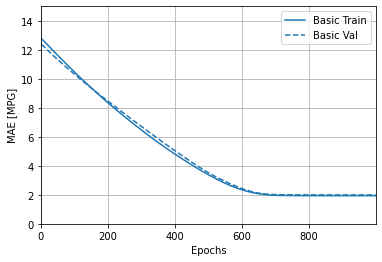

In [ ]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 15])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

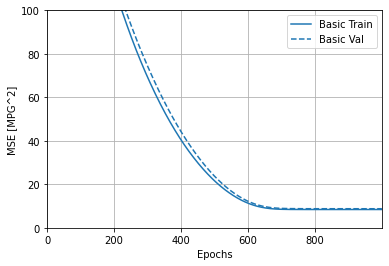

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 100])
plt.ylabel('MSE [MPG^2]')

In [ ]:
print("main weghts: \n", w)
print("models weights: ")
model.get_weights()

main weghts: 
 [ -8.48102987 -17.00716636  -1.72604693 -16.02683157   0.39440931]
models weights: 


[array([[ -8.52014   ],
        [-16.90487   ],
        [ -1.8641853 ],
        [-16.015572  ],
        [  0.65378165]], dtype=float32), array([5.093298], dtype=float32)]

---
#Example 2

In [ ]:
# Use seaborn for pairplot
!pip install seaborn

# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-zb0blkg7
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-zb0blkg7
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.07a2dd2ee00754fbf4841ad857175e33f0f71f5b5_-cp36-none-any.whl size=124684 sha256=e61e4267289144957977baa786e1214ae1e18912b21bd0db2b2352c19875f4e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-pweamgbl/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

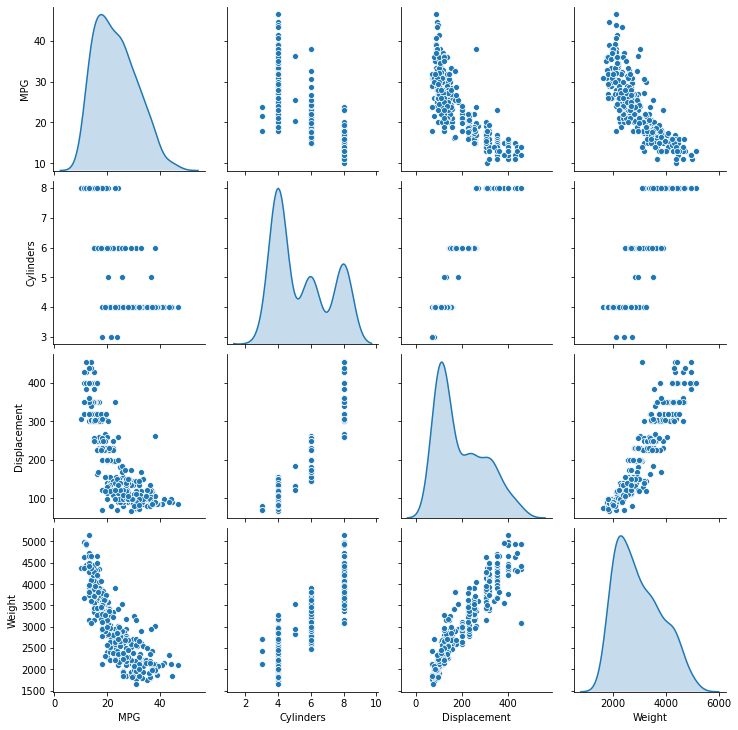

In [ ]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

---
##Normal FF-FC model

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.06424424],
       [ 0.00783993],
       [-0.2562581 ],
       [ 0.05255318],
       [-0.3689086 ],
       [-0.14572522],
       [-0.37293673],
       [-0.4832209 ],
       [-0.01805185],
       [-0.5159713 ]], dtype=float32)

In [ ]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:574.0094,  mae:22.6763,  mse:574.0094,  val_loss:564.7867,  val_mae:22.4393,  val_mse:564.7867,  
....................................................................................................
Epoch: 100, loss:5.9378,  mae:1.7225,  mse:5.9378,  val_loss:7.7571,  val_mae:2.0922,  val_mse:7.7571,  
....................................................................................................
Epoch: 200, loss:5.1840,  mae:1.5488,  mse:5.1840,  val_loss:8.6824,  val_mae:2.1393,  val_mse:8.6824,  
....................................................................................................
Epoch: 300, loss:4.9199,  mae:1.5129,  mse:4.9199,  val_loss:8.0846,  val_mae:2.1543,  val_mse:8.0846,  
....................................................................................................
Epoch: 400, loss:4.2760,  mae:1.4304,  mse:4.2760,  val_loss:8.2054,  val_mae:2.1597,  val_mse:8.2054,  
..............................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.367288,1.040293,2.367288,8.454002,2.152828,8.454002,995
996,2.243665,0.976356,2.243665,8.466698,2.172624,8.466698,996
997,2.231928,0.967041,2.231928,8.657284,2.189496,8.657284,997
998,2.184035,0.998948,2.184035,8.546650,2.149016,8.546650,998
999,2.341363,1.022392,2.341363,9.610226,2.321429,9.610226,999


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

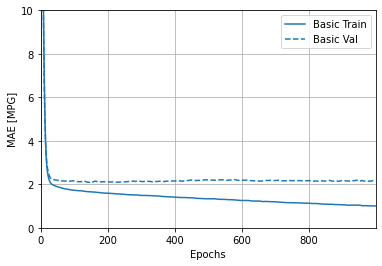

In [ ]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

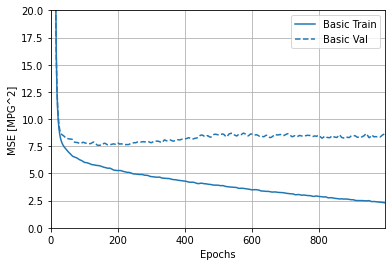

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:573.1068,  mae:22.6610,  mse:573.1068,  val_loss:566.5107,  val_mae:22.4867,  val_mse:566.5107,  
.......................................................................................

Text(0, 0.5, 'MAE [MPG]')

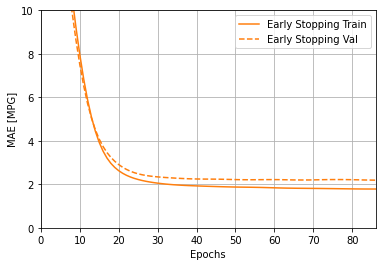

In [ ]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.6947 - mae: 1.8574 - mse: 5.6947
Testing set Mean Abs Error:  1.86 MPG


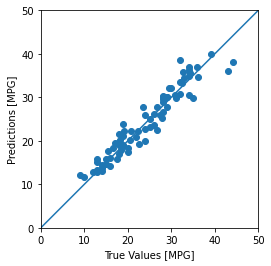

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


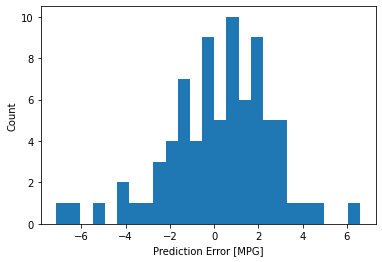

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

---
##RBN model

In [ ]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [ ]:
def build_RBN_model():
  model = keras.Sequential([
    RBFLayer(64, 0.5, input_shape=[len(train_dataset.keys())]),
    RBFLayer(64, 0.5),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_RBN_model()

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rbf_layer_6 (RBFLayer)       (None, 64)                576       
_________________________________________________________________
rbf_layer_7 (RBFLayer)       (None, 64)                4096      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.13419418],
       [-0.06026459],
       [-0.16633973],
       [-0.16490617],
       [-0.16635735],
       [-0.00452772],
       [-0.1663211 ],
       [-0.1663239 ],
       [-0.00032333],
       [-0.16633862]], dtype=float32)

In [ ]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:580.3810,  mae:22.8370,  mse:580.3810,  val_loss:583.8754,  val_mae:22.8855,  val_mse:583.8754,  
....................................................................................................
Epoch: 100, loss:44.0108,  mae:5.3169,  mse:44.0108,  val_loss:45.7712,  val_mae:5.3799,  val_mse:45.7712,  
....................................................................................................
Epoch: 200, loss:19.2099,  mae:3.2052,  mse:19.2099,  val_loss:24.0813,  val_mae:3.5655,  val_mse:24.0813,  
....................................................................................................
Epoch: 300, loss:15.1057,  mae:2.8076,  mse:15.1057,  val_loss:18.0862,  val_mae:2.9167,  val_mse:18.0862,  
....................................................................................................
Epoch: 400, loss:11.4416,  mae:2.4248,  mse:11.4416,  val_loss:14.9630,  val_mae:2.6546,  val_mse:14.9630,  
..............................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,5.693004,1.626661,5.693004,14.276446,2.741785,14.276446,995
996,5.786024,1.634729,5.786024,14.284801,2.753808,14.284801,996
997,5.707673,1.632648,5.707673,14.317036,2.766757,14.317036,997
998,5.713222,1.616293,5.713222,14.296738,2.760553,14.296738,998
999,5.691301,1.622541,5.691301,14.251093,2.729559,14.251093,999


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

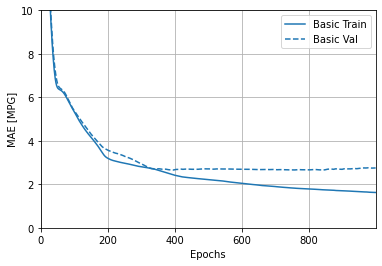

In [ ]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

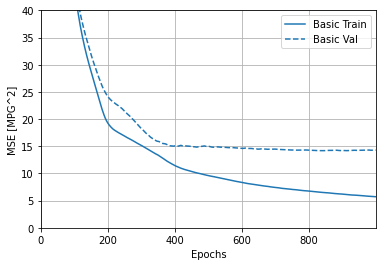

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 40])
plt.ylabel('MSE [MPG^2]')

In [ ]:
model = build_RBN_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:632.7557,  mae:23.9280,  mse:632.7557,  val_loss:638.0787,  val_mae:24.0224,  val_mse:638.0787,  
....................................................................................................
Epoch: 100, loss:44.3161,  mae:5.3352,  mse:44.3161,  val_loss:46.0972,  val_mae:5.3960,  val_mse:46.0972,  
....................................................................................................
Epoch: 200, loss:19.9373,  mae:3.2875,  mse:19.9373,  val_loss:25.1015,  val_mae:3.6509,  val_mse:25.1015,  
....................................................................................................
Epoch: 300, loss:15.1413,  mae:2.7908,  mse:15.1413,  val_loss:18.6748,  val_mae:2.9861,  val_mse:18.6748,  
....................................................................................................
Epoch: 400, loss:11.9196,  mae:2.4737,  mse:11.9196,  val_loss:15.1118,  val_mae:2.6550,  val_mse:15.1118,  
..............................................

Text(0, 0.5, 'MAE [MPG]')

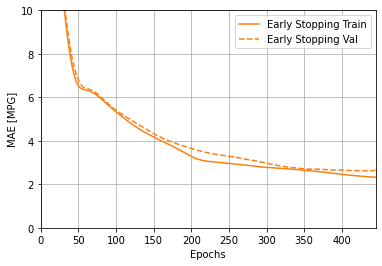

In [ ]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 18.3580 - mae: 2.8115 - mse: 18.3580
Testing set Mean Abs Error:  2.81 MPG


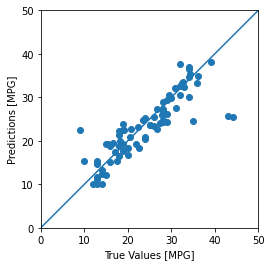

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


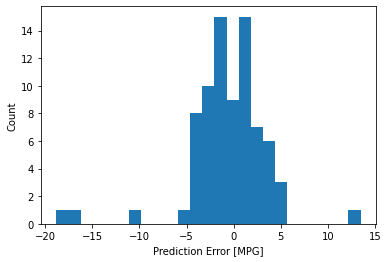

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")